In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pysr import PySRRegressor

In [2]:
import matplotlib
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'

import warnings
warnings.filterwarnings('ignore')

In [3]:
x_0 = 2
omega = 10
delta = 0.5

def damped_osc(t):
    x = x_0*np.cos(omega*t)*np.exp(-delta*t)
    return x

t = np.linspace(0, 10, 1000).reshape(-1, 1)
x = damped_osc(t)

$$
\begin{align}
x(t) & = x_0*cos(\omega*t)*e^{-\delta*t} \\
& = 2*cos(10*t)*e^{-0.5*t}
\end{align}
$$

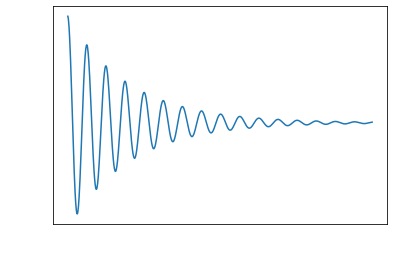

In [4]:
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)');

In [5]:
model = PySRRegressor(
    model_selection = 'best',
    niterations = 40,
    binary_operators = ['+', '*'],
    unary_operators = [
        'sin',
        'cos',
        'exp',
        'inv(x) = 1/x',
    ],
    extra_sympy_mappings = {'inv': lambda x: 1/x},
    loss = 'loss(x, y) = (x - y)^2',
)

In [6]:
model.fit(t, x)

PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                       0.0019308593   
	1         0.028987                               exp(x0 * -12.045129)   
	2         0.207915                  (cos(x0 * -9.99648) * 0.40061918)   
	3         0.142197               (inv(exp(x0)) * cos(x0 * -9.999872))   
	4         1.020414      (exp(x0 * -0.26807776) * cos(x0 * -9.999877))   
	5         0.381070  ((inv(exp(x0)) * 2.642482) * cos(x0 * -10.0004...   
	6  >>>>  18.115450  (exp((x0 * -0.500036) + 0.693171) * cos(x0 * -...   
	7         0.063296  (exp((x0 * -0.5000295) + 0.69319785) * cos((x0...   
	8         1.158049  (exp(((x0 * 0.92543924) + -1.2829093) * -0.540...   
	
	           loss  complexity  
	0  2.022884e-01           1  
	1  1.854401e-01           4  
	2  1.223519e-01           6  
	3  9.206612e-02           8  
	4  3.318483e-02           9  
	5  2.266955e-02          10  
	6  3.076118e-10          11  
	7  2.710349e-10          13  
	8  2.673971e-11          15  
]

In [7]:
solution = model.equations_
solution = solution.loc[solution['score'] == solution['score'].max(), 'sympy_format'].item()

solution

2.00004763944748*exp(-0.500036*x0)*cos(9.999993*x0)

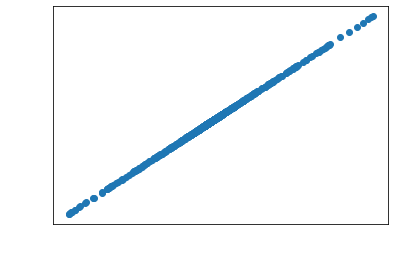

In [8]:
x_pred = model.predict(t)

plt.scatter(x, x_pred)
plt.xlabel('x')
plt.ylabel('x_pred')
plt.show()